In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io

plt.rcParams['figure.figsize'] = [14, 14]
plt.rcParams.update({'font.size': 18})

mat = scipy.io.loadmat("/mnt/c/Users/nikhi/Documents/sem4/mis/project/allFaces.mat")
faces = mat['faces']
nfaces = mat['nfaces'].reshape(-1)

In [3]:
def add_noise(img):
 
    # Getting the dimensions of the image
    row , col = img.shape
     
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = np.random.randint(300, 10000)*5
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord= np.random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord= np.random.randint(0, col - 1)
         
        # Color that pixel to white
        img[y_coord][x_coord] = 255
         
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = np.random.randint(300 , 10000)*5
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord= np.random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord= np.random.randint(0, col - 1)
         
        # Color that pixel to black
        img[y_coord][x_coord] = 0
         
    return img

In [4]:
def patch_noise(data):
    no_of_pixels , no_of_images = data.shape  
    patch_size = 40
    for i in range(no_of_images):
        image = data[:, i] 
        image = image.reshape(168, 192)
        row_start = np.random.randint(0, image.shape[0]-patch_size)
        row_end = row_start + patch_size
        col_start = np.random.randint(0, image.shape[1]-patch_size)
        col_end = col_start + patch_size
        image[row_start:row_end, col_start:col_end] = 0
        data[:,i] = image.reshape(-1) 
        
    return data   

In [5]:
def plt_singular_values(data):
    average_face = data.mean(axis=0)
    centered = data - average_face
    U, S, Vt = np.linalg.svd(data, full_matrices = False)
    fig, ax = plt.subplots()
    ax.plot(S)

In [6]:
def compute_rank_k_approximation(data, k):
    average_face = data.mean(axis=0)
    centered = data - average_face
    U, S, Vt = np.linalg.svd(data, full_matrices = False)
    approx = (U @ np.diag(S))[:, :k] @ Vt[:k]
    L = approx + average_face
    E = data - L
    return L,E

In [7]:
def my_plot(X,L,S, k): 
    fig,axs = plt.subplots(1,3)
    axs = axs.reshape(-1)
    axs[0].imshow(np.reshape(X[:,k-1],(168,192)).T,cmap='gray')
    axs[0].set_title('X')
    axs[1].imshow(np.reshape(L[:,k-1],(168,192)).T,cmap='gray')
    axs[1].set_title('L')
    axs[2].imshow(np.reshape(S[:,k-1],(168,192)).T,cmap='gray')
    axs[2].set_title('E')
    for ax in axs:
        ax.axis('off')

In [8]:
X = faces[:,:nfaces[0]+nfaces[1]]

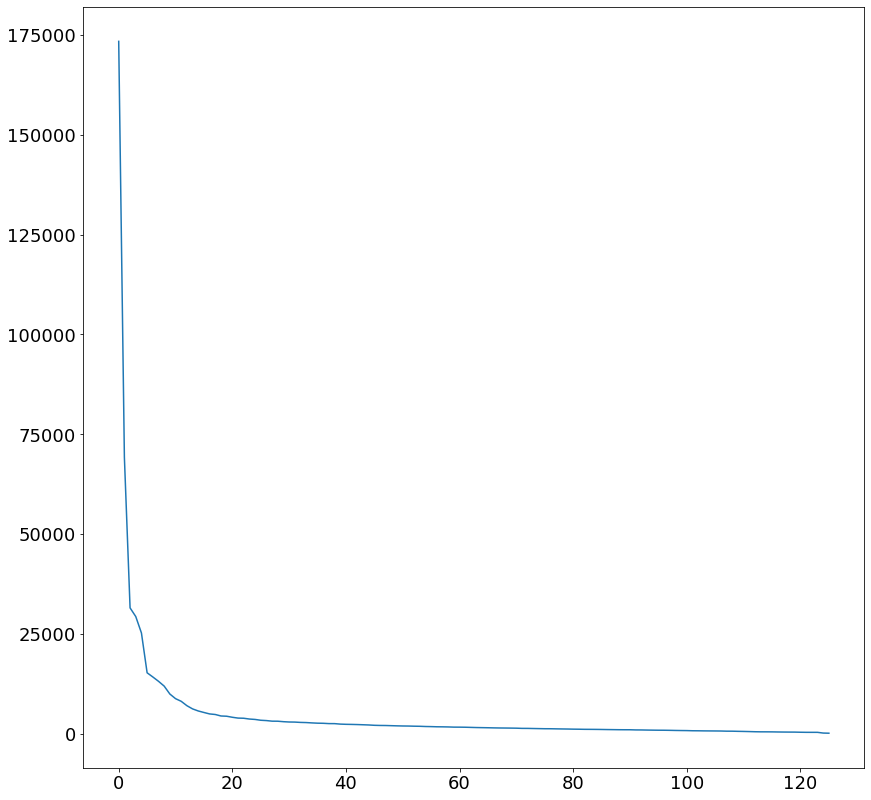

In [9]:
plt_singular_values(X)

In [10]:
L,S = compute_rank_k_approximation(X, 10)

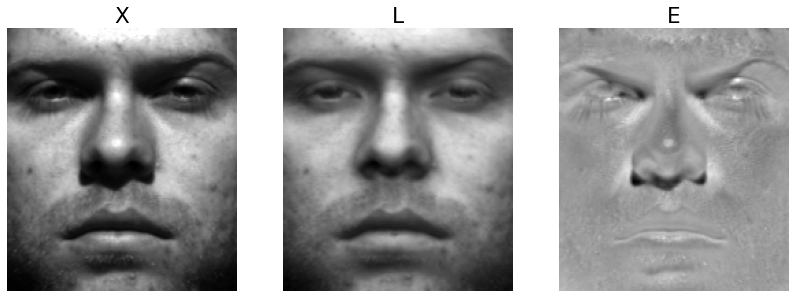

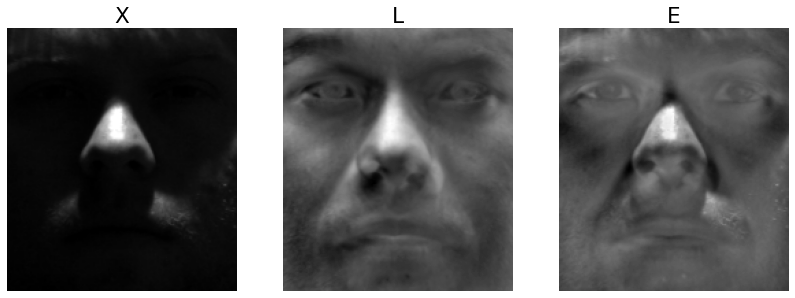

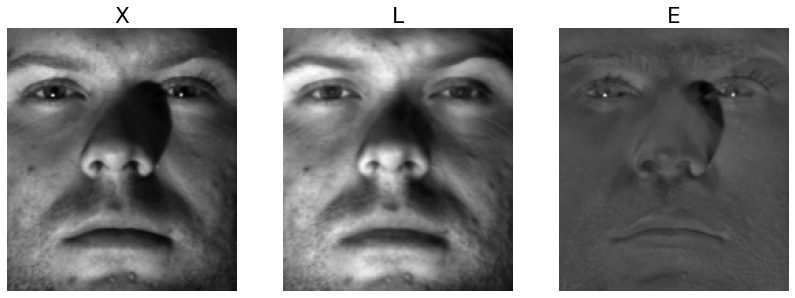

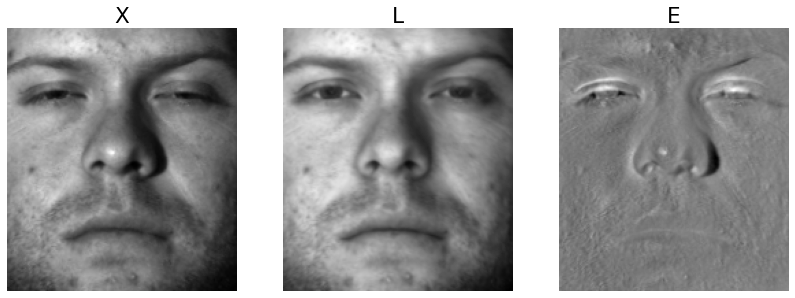

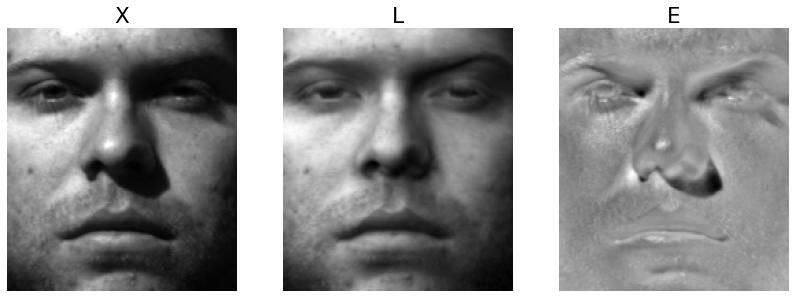

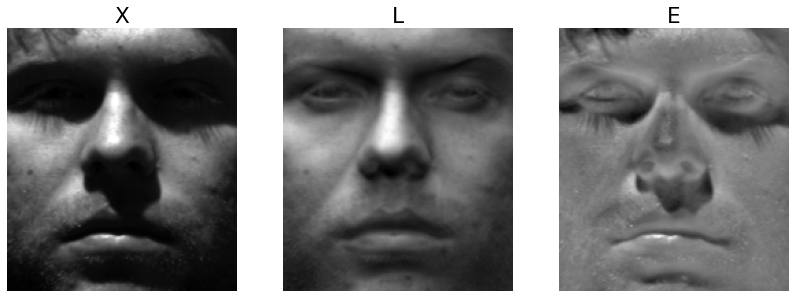

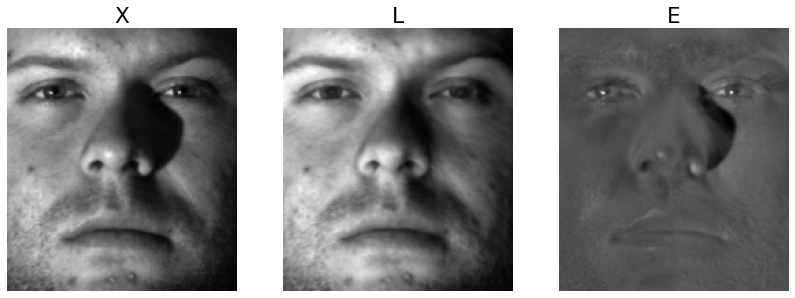

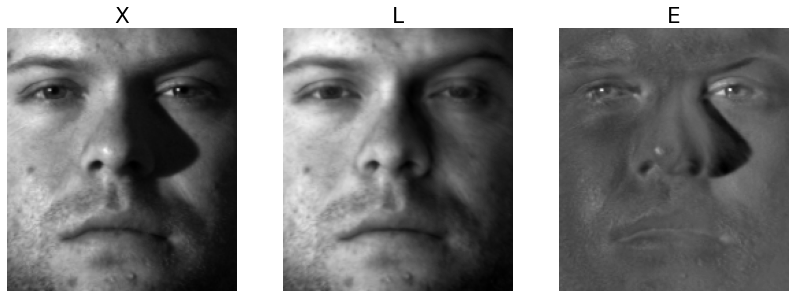

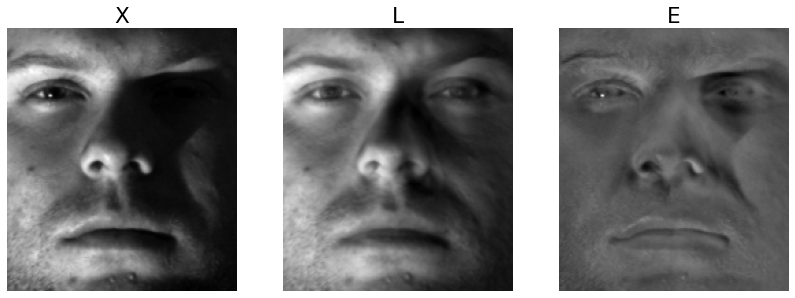

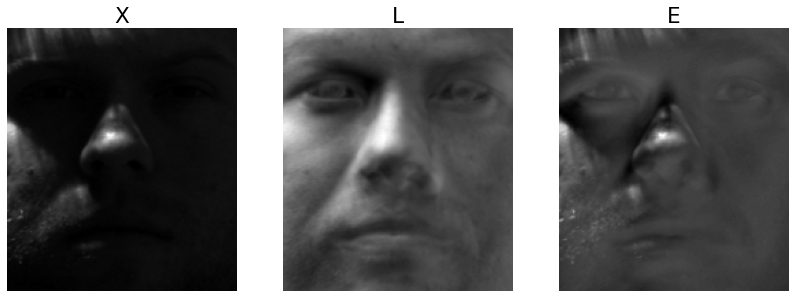

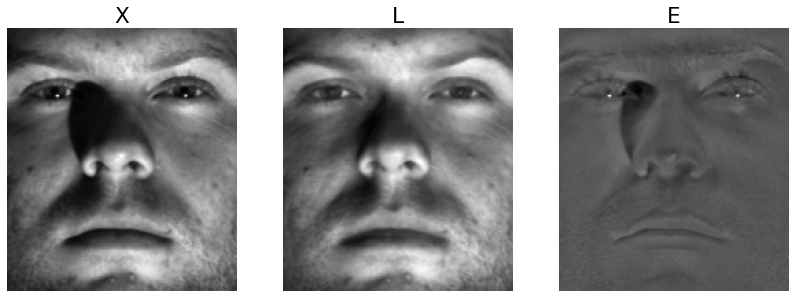

In [11]:
inds = (3,4,14,15,17,18,19,20,21,32,43)

for i in inds:
    my_plot(X,L,S, i)

In [12]:
X2 = add_noise(X) 

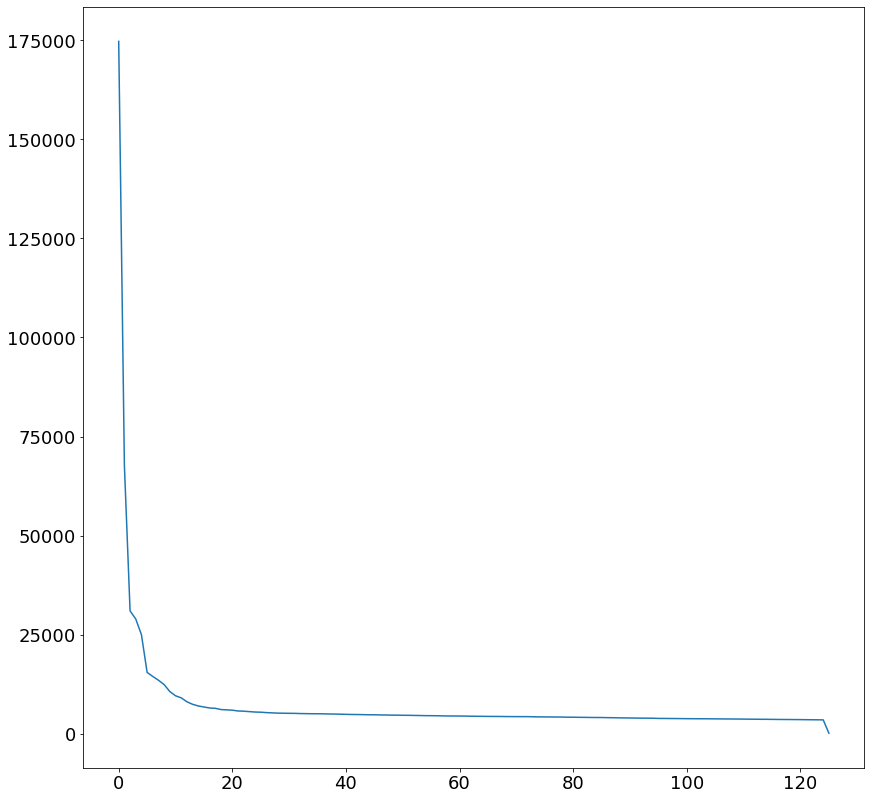

In [13]:
plt_singular_values(X2)

In [14]:
L2,S2 = compute_rank_k_approximation(X2, 10)

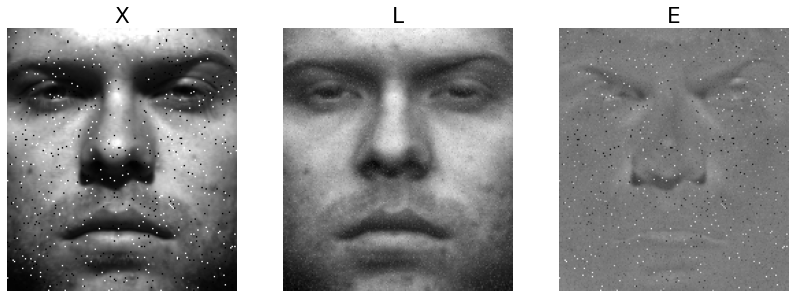

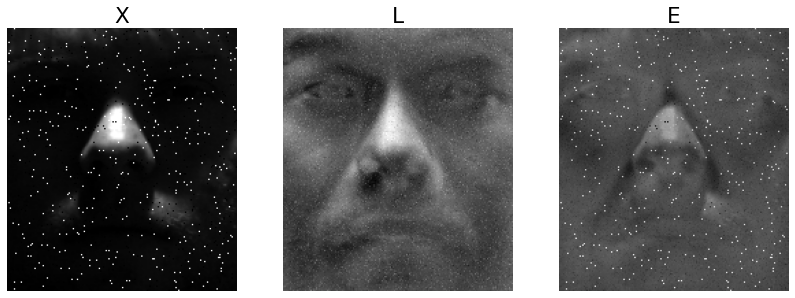

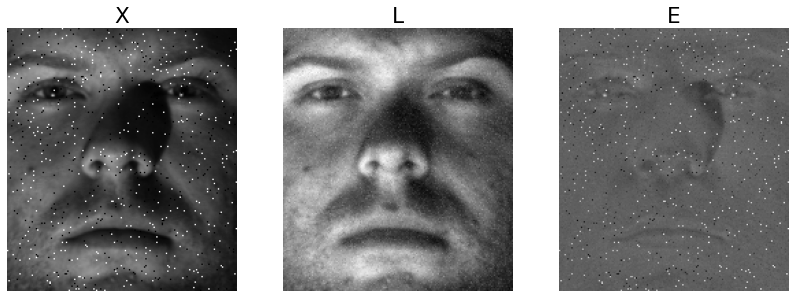

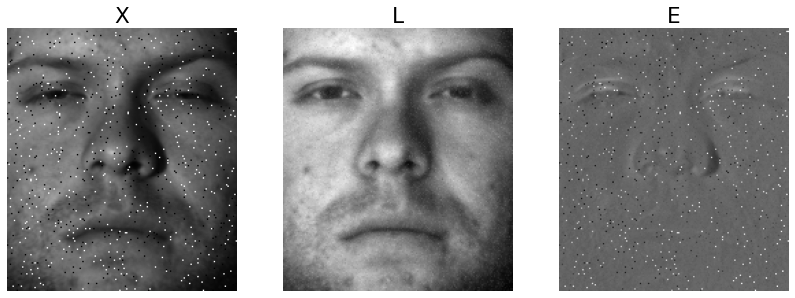

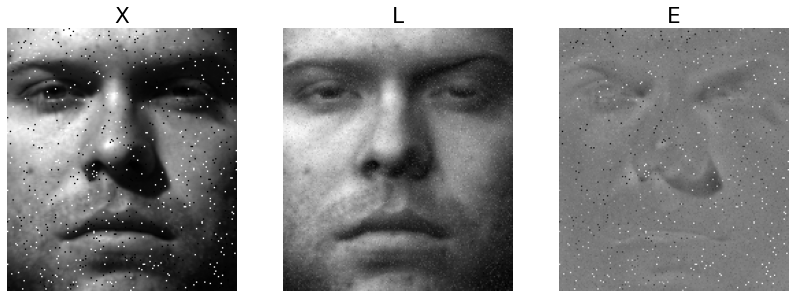

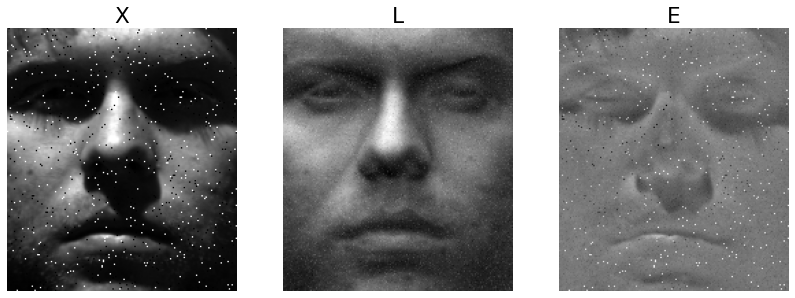

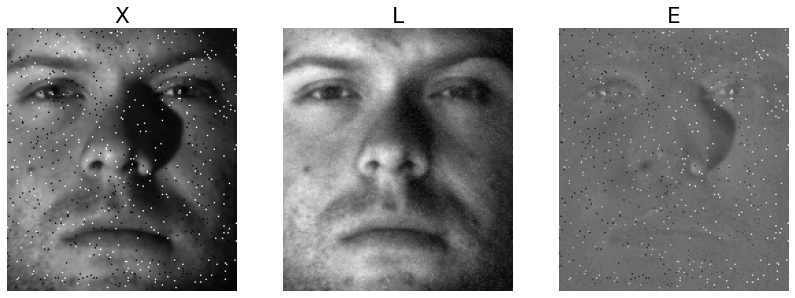

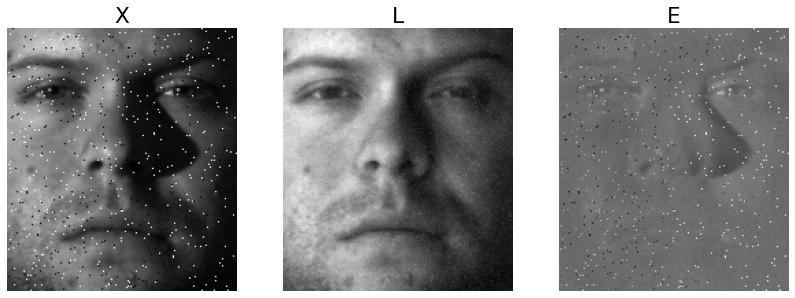

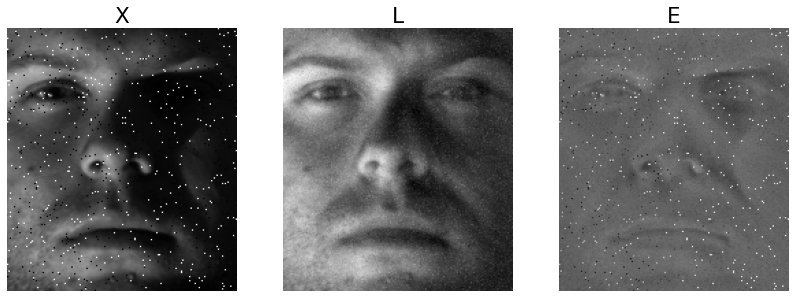

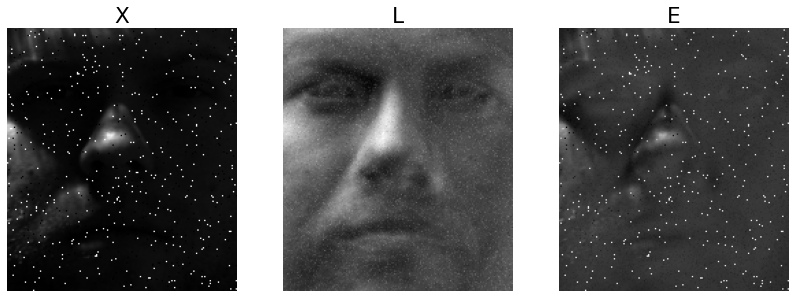

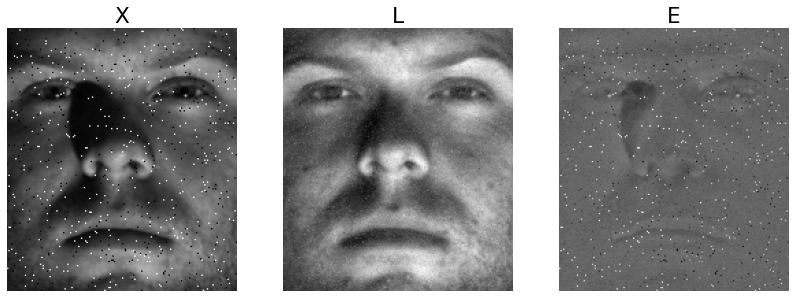

In [15]:
for i in inds:
    my_plot(X2,L2,S2, i)

In [16]:
X3 = patch_noise(X) 

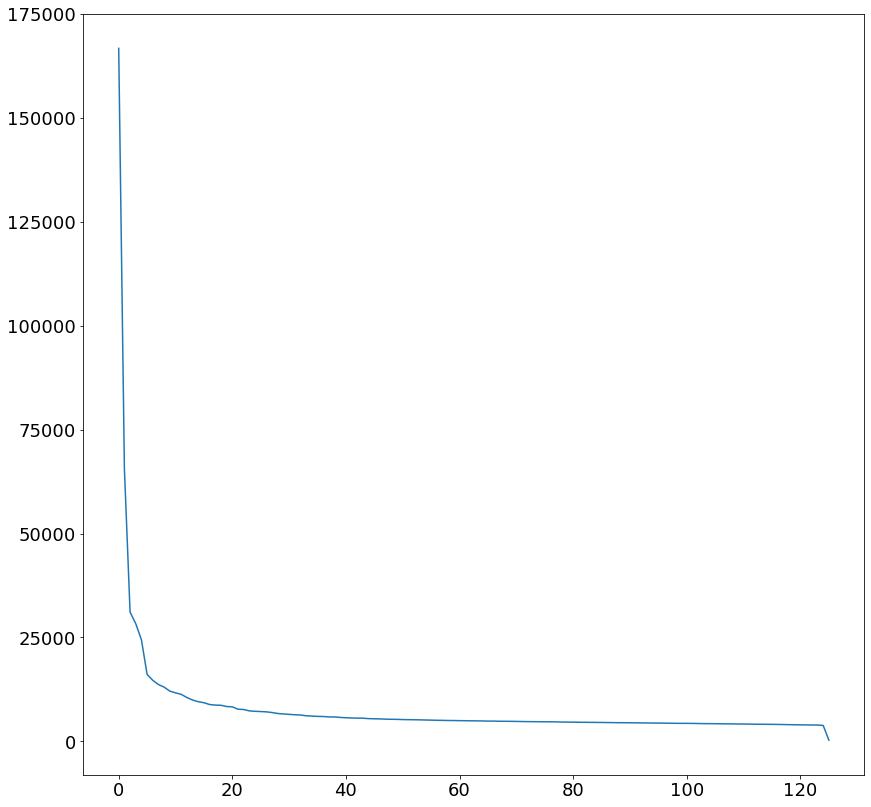

In [17]:
plt_singular_values(X3)

In [18]:
L3,S3 = compute_rank_k_approximation(X3, 10)

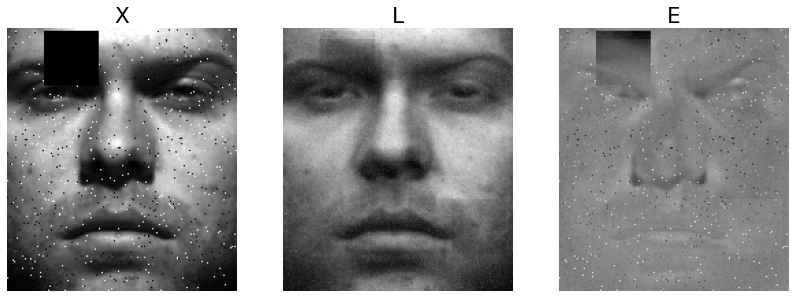

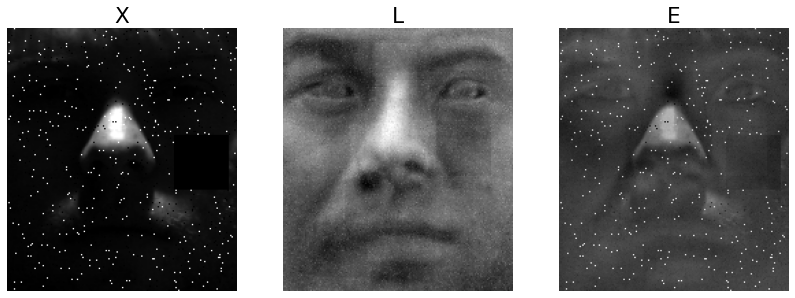

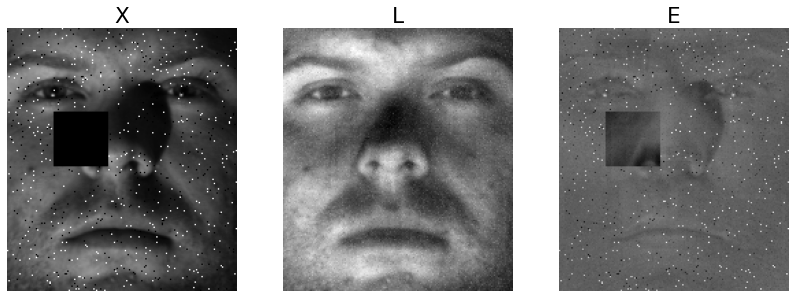

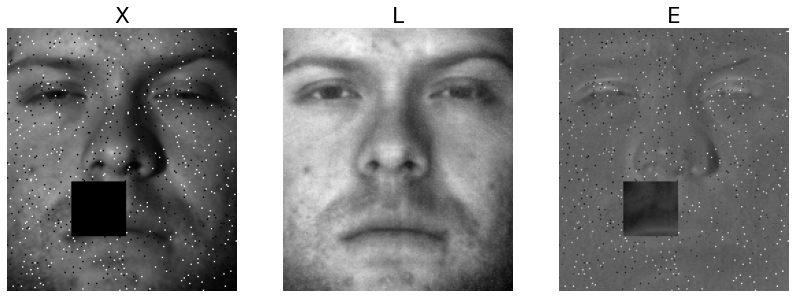

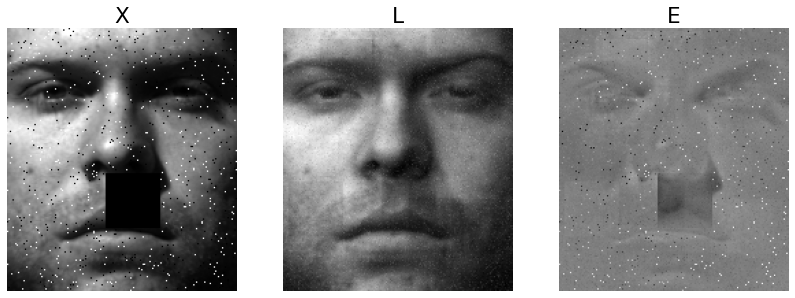

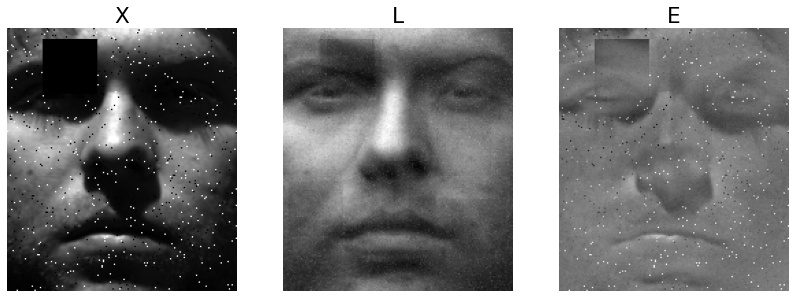

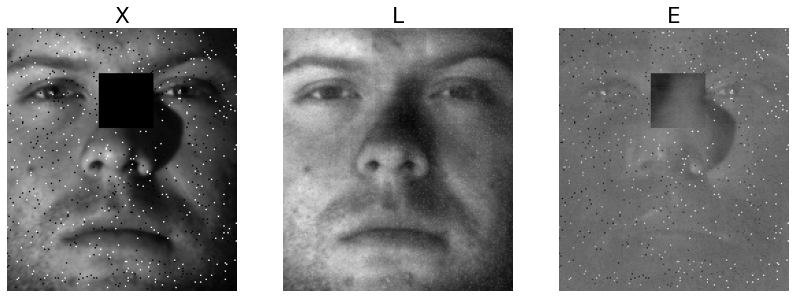

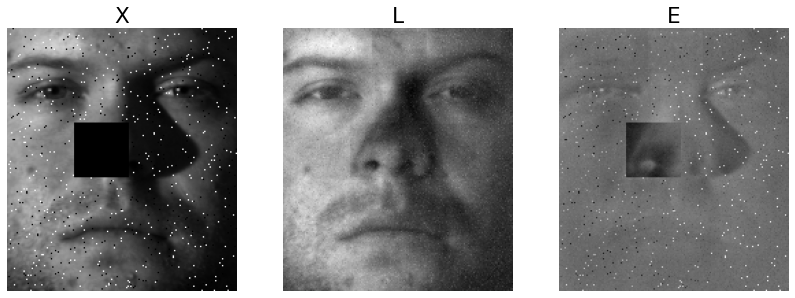

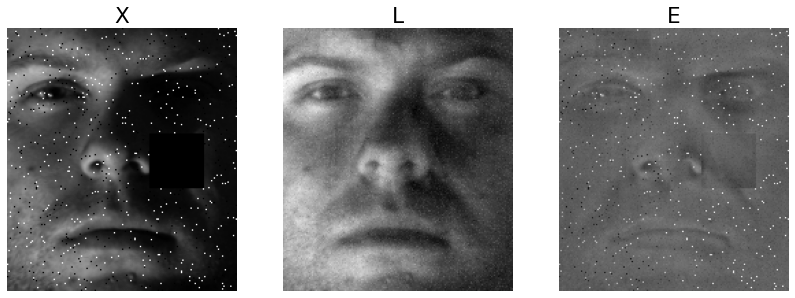

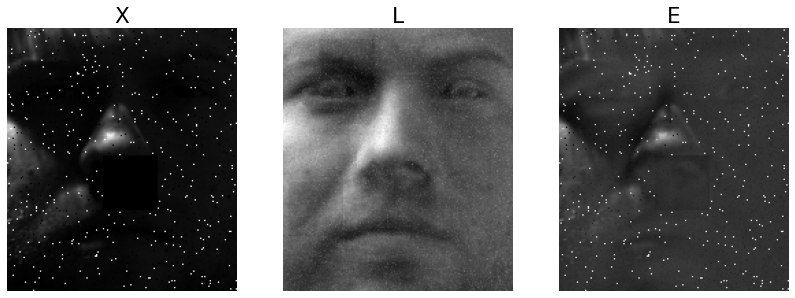

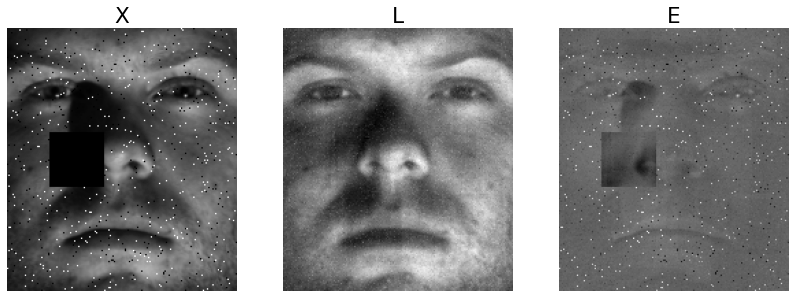

In [19]:
for i in inds:
    my_plot(X3,L3,S3, i)